In [2]:
import os
print(os.getcwd())

C:\Users\Stijn Daemen\Documents\master thesis TU Delft\code\IAM_RICE2\jupyter notebooks


In [12]:
import numpy as np
np.random.seed(42)

In [1]:
def dominates(a, b):
    # assumes minimization
    # a dominates b if it is <= in all objectives and < in at least one
    # Note SD: somehow the logic with np.all() breaks down if there are positive and negative numbers in the array
    # So to circumvent this but still allow multiobjective optimisation in different directions under the
    # constraint that every number is positive, just add a large number to every index.
    large_number = 1000000000

    a = np.array(a)
    a = a + large_number

    b = np.array(b)
    b = b + large_number
    # print(f'a: {a}')
    # print(f'b: {b}')
    return (np.all(a <= b) and np.any(a < b))

In [17]:
def create_individual():
    return list(np.random.randint(-10, 10, size=3))

In [20]:
non_dominated = []
family = []

In [21]:
for _ in range(10):
    family.append(create_individual())

In [22]:
family

[[-9, 1, -5],
 [-9, -10, 1],
 [1, 6, -1],
 [5, 4, 4],
 [8, 1, 9],
 [-8, -6, 8],
 [-4, -2, -4],
 [7, -7, 3],
 [7, -2, -9],
 [9, 4, -4]]

In [30]:
non_dominated = [family[4]]

In [31]:
non_dominated

[[8, 1, 9]]

In [34]:
for candidate in family:
    print(candidate)
    for solution in non_dominated:
        print(solution)
        if dominates(candidate, solution):
            print('candidiate dominates solution')
            non_dominated.pop(solution)
            non_dominated.append(candidate)

[-9, 1, -5]
[8, 1, 9]


TypeError: 'list' object cannot be interpreted as an integer

In [61]:
overall_ledger = []
non_dominated = []
family = []

for _ in range(10):
    family.append(create_individual())
    
overall_ledger.append(family)

A = np.array(family)
N = len(family)
print(family)
keep = np.ones(N, dtype=bool)
print(keep)

for i in range(N):
    for j in range(i+1, N):
        if keep[j] and dominates(A[i], A[j]):
            keep[j] = False

        elif keep[i] and dominates(A[j], A[i]):
            keep[i] = False
print(keep)
non_dominated = list(A[keep])



[[-1, -8, -2], [2, 7, 4], [-7, 4, -9], [4, -3, -3], [6, 1, 8], [-1, -2, -6], [-5, 9, -9], [2, -5, -6], [-10, -5, -5], [5, -7, 0]]
[ True  True  True  True  True  True  True  True  True  True]
[ True False  True False False  True False  True  True False]
[[ -1  -8  -2]
 [ -7   4  -9]
 [ -1  -2  -6]
 [  2  -5  -6]
 [-10  -5  -5]]


In [95]:
np.random.randint(1,4)

1

In [108]:
np.random.choice([1, 2, 3, 4, 5, 6, 7, 8, 9], 3, replace=False)

array([5, 1, 9])

In [57]:
def archive_sort(self, A, fA, P, fP):
    # print(f'A before: {A}')
    # print(f'P : {P}')
    A = np.hstack((A, P))
    # print(f'A after: {A}')

    
    # print(f'fA before: {fA}')
    # print(f'fP : {fP}')
    fA = np.vstack((fA, fP))
    # print(f'fA after: {fA}')
    N = len(A)
    keep = np.ones(N, dtype=bool)
    # print(f'keep before: {keep}')
    for i in range(N):
        for j in range(i + 1, N):
            if keep[j] and self.dominates(fA[i, :], fA[j, :]):
                keep[j] = False

            elif keep[i] and self.dominates(fA[j, :], fA[i, :]):
                keep[i] = False

            elif self.same_box(fA[i, :], fA[j, :]):
                keep[np.random.choice([i, j])] = False
    # print(f'keep after: {keep}')
    # print(f'A[keep]: {A[keep]}')
    return (A[keep], fA[keep, :])

In [ ]:
# find indices of solutions that dominate others
def pareto_front_finding(fitness_values, pop_index):
    pop_size = fitness_values.shape[0]
    pareto_front = np.ones(pop_size, dtype=bool)    # all True initially
    for i in range(pop_size):
        for j in range(pop_size):
            if all(fitness_values[j] <= fitness_values[i]) and any(fitness_values[j] < fitness_values[i]):
                pareto_front[i] = 0 # i is not in pareto front becouse j dominates i
                break

    return pop_index[pareto_front]  # arr(len_pareto_front,)

# repeat Pareto front selection to build a population within defined size limits
def selection(pop, fitness_values, pop_size):
    
    pop_index_0 = np.arange(pop.shape[0])   # unselected pop ids
    pop_index = np.arange(pop.shape[0])     # all pop ids. len = len(pop_size)
    pareto_front_index = []
    
    while len(pareto_front_index) < pop_size:   # pop_size = initial_pop_size
        new_pareto_front = pareto_front_finding(fitness_values[pop_index_0, :], pop_index_0)
        total_pareto_size = len(pareto_front_index) + len(new_pareto_front)

        # check the size of pareto_front, if larger than pop_size then remove some
        if total_pareto_size > pop_size:
            number_solutions_needed = pop_size - len(pareto_front_index)
            selected_solutions = remove_using_crowding(fitness_values[new_pareto_front], number_solutions_needed)
            new_pareto_front = new_pareto_front[selected_solutions]
        
        pareto_front_index = np.hstack((pareto_front_index, new_pareto_front))
        remaining_index = set(pop_index) - set(pareto_front_index)
        pop_index_0 = np.array(list(remaining_index))
        
    selected_pop = pop[pareto_front_index.astype(int)]

    return selected_pop     # arr(pop_size x n_var)

Test to see difference any() and all() for establishing archive_sort() in old POT algo

In [3]:
import numpy as np

In [25]:
# a = [1, 2, 3]
# b = [4, 5, 6]

a = [2, 2, 5]
b = [4, 5, 6]

In [26]:
print(np.any(a < b))
print(np.all(a <= b))

True
True


In [41]:
c = [2, 3, 6]
d = [2, 6, 7]

In [43]:
print(np.any(c < d))
# print(np.all(c <= d))

True


In [56]:
e = [4, 2]
f = [3, 3]
np.any(e < f)

False

In [57]:
np.any(e < f)

False

In [10]:
a = [2, 2, 7]
b = [4, 5, 8]

In [9]:
np.all(a <= b)

False

In [15]:
c = [-42407.86632176343, -11951122.864490815, 3.910692983823753]
d = [-42356.93698573813, -5972792.737317861, 3.873526079827485]

In [16]:
np.all(c <= d)

True

The e and f example shows the solution to the problem, just add a really large number

In [50]:
e = [-3, -4, 7]
f = [-1, -2, 5]

In [51]:
np.all(e <= f)

True

In [52]:
large_number = 1000000000

In [53]:
e = np.array(e)
e = e + large_number

In [54]:
f = np.array(f)
f = f + large_number

In [55]:
print(e)
print(f)

[ 999999997  999999996 1000000007]
[ 999999999  999999998 1000000005]


In [56]:
np.all(e <= f)

False

In [2]:
import numpy as np

In [5]:
s = np.random.uniform(-1,0,5)

In [6]:
s

array([-0.88797985, -0.16817014, -0.28348788, -0.15930286, -0.40909251])

In [57]:
import itertools

In [59]:
itertools.combinations(a, 2)

In [70]:
# stuff = [1, 2, 3]
# for L in range(len(stuff) + 1):
#     for subset in itertools.combinations(stuff, L):
#         print(subset)
g = [1,2,3,4,5,6,7,8,9]
h = [1,2,3,4]
print(g)
for subset in itertools.permutations(h, 2):
        print(subset)

[1, 2, 3, 4, 5, 6, 7, 8, 9]
(1, 2)
(1, 3)
(1, 4)
(2, 1)
(2, 3)
(2, 4)
(3, 1)
(3, 2)
(3, 4)
(4, 1)
(4, 2)
(4, 3)


In [99]:
non_dominated = [1, 2, 3, 4, 5]

In [100]:
P = np.random.choice(non_dominated, 2, replace=False)

In [101]:
[i for i in non_dominated if i not in P]

[1, 4, 5]

In [120]:
ab = [1, 2]

In [121]:
ac = [1, 3, 5]

In [122]:
ac.extend(ab)

In [123]:
ac

[1, 3, 5, 1, 2]

In [125]:
non = []
if not non:
    print('empty')

empty


In [144]:
d_dict = {}
d_dict[0] = {'a': [1, 2, 3],
            'b': [6, 2, 3],
            'c': [9, 0, 3],}
d_dict[1] = {'d': [7, 4, 8],
            'e': [5, 0, 8],
            'f': [2, 3, 7],}

In [129]:
import pandas as pd

In [139]:
len(d_dict.keys())

2

In [156]:
dfs = []
for i in range(len(d_dict.keys())):
    df = pd.DataFrame.from_dict(d_dict[i], orient='index', columns=['ofv1', 'ofv2', 'ofv3'])
    df['policy'] = df.index
    df['generation'] = i
    print(df.head())
    dfs.append(df)
df = pd.concat(dfs)
df.reset_index(drop=True, inplace=True)

   ofv1  ofv2  ofv3 policy  generation
a     1     2     3      a           0
b     6     2     3      b           0
c     9     0     3      c           0
   ofv1  ofv2  ofv3 policy  generation
d     7     4     8      d           1
e     5     0     8      e           1
f     2     3     7      f           1


In [157]:
df_tot = pd.concat(dfs)
df_tot.reset_index(drop=True, inplace=True)

In [158]:
df_tot

,ofv1,ofv2,ofv3,policy,generation
0,1,2,3,a,0
1,6,2,3,b,0
2,9,0,3,c,0
3,7,4,8,d,1
4,5,0,8,e,1
5,2,3,7,f,1


In [137]:
df = pd.DataFrame.from_dict(d_dict, orient='tight')

ValueError: only recognize index or columns for orient

In [136]:
df

,0,1
a,"[1, 2, 3]",NaN
b,"[6, 2, 3]",NaN
c,"[9, 0, 3]",NaN
d,NaN,"[7, 4, 8]"
e,NaN,"[5, 0, 8]"
f,NaN,"[2, 3, 7]"


In [59]:
A = [1, 2, 3, 4, 5]

In [60]:
keep = [True, True, False, False, True]

In [61]:
A[keep]

TypeError: list indices must be integers or slices, not list

Run RICE with Nordhaus policy in Basic scenario

In [23]:
from RICE_model.IAM_RICE import RICE

years_10 = []
for i in range(2005, 2315, 10):
    years_10.append(i)

regions = [
    "US",
    "OECD-Europe",
    "Japan",
    "Russia",
    "Non-Russia Eurasia",
    "China",
    "India",
    "Middle East",
    "Africa",
    "Latin America",
    "OHI",
    "Other non-OECD Asia",
]

levers = {'mu_target': 2135,
              'sr': 0.248,
              'irstp': 0.015}

m1, m2, m3 = RICE(years_10, regions, levers=levers).DMDU_control()
print(m1, m2, m3)

-42456.671297561035 -5976340.535159354 3.9574968783133793


Try out platypus-opt library with NSGAII

In [5]:
from platypus.algorithms import NSGAIII
from platypus.problems import DTLZ2

In [6]:
problem = DTLZ2(3)

In [7]:
algorithm = NSGAIII(problem, divisions_outer=12)
algorithm.run(10000)

In [10]:
print(" Obj1\t Obj2\t Obj3")

for solution in algorithm.result[:5]:
    print("%0.3f\t%0.3f\t%0.3f" % tuple(solution.objectives))

 Obj1	 Obj2	 Obj3
0.211	0.103	0.974
0.544	0.798	0.273
0.493	0.117	0.866
0.821	0.409	0.419
0.902	0.448	0.000


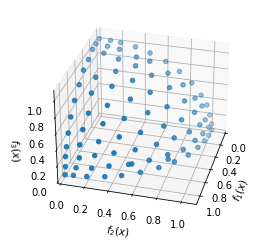

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter([s.objectives[0] for s in algorithm.result],
           [s.objectives[1] for s in algorithm.result],
           [s.objectives[2] for s in algorithm.result])
ax.set_xlabel("$f_1(x)$")
ax.set_ylabel("$f_2(x)$")
ax.set_zlabel("$f_3(x)$")
ax.set_xlim([0, 1.1])
ax.set_ylim([0, 1.1])
ax.set_zlim([0, 1.1])
ax.view_init(elev=30.0, azim=15)
plt.show()

Try out the borg algorithm on test problem

In [1]:
# Copyright 2012-2014 The Pennsylvania State University
# Copyright 2020 Cornell University
#
# This software was written by Andrew Dircks, Dave Hadka, and others.
#
# The use, modification and distribution of this software is governed by the
# The Pennsylvania State University Research and Educational Use License.
# You should have received a copy of this license along with this program.
# If not, contact <info@borgmoea.org>.

'''

Solve the DTLZ2 test problem with PyBorg and visualize the results.

'''

from platypus import DTLZ2
from pyborg import BorgMOEA


if __name__ == "__main__":

    # define a DTLZ2 problem instance from the Platypus library
    nobjs = 3
    problem = DTLZ2(nobjs)

    # define and run the Borg algorithm for 10000 evaluations
    algorithm = BorgMOEA(problem, epsilons=0.1)
    algorithm.run(10000)

    # print the results
    for solution in algorithm.result:
        print(solution.objectives)

[0.7592942946184186, 0.0011772321267498871, 0.6524675234022671]
[4.019864944420776e-17, 0.656493765748551, 0.7558646792617912]
[0.011678968024498585, 0.7633093882795199, 0.6466424189555376]
[0.25374250754993294, 0.3678922659953662, 0.8954053500713732]
[0.6931399410779977, 0.17850081695231193, 0.6990286121952984]
[0.6894493419318276, 0.5608778375335889, 0.4597870636662546]
[0.5990939020890073, 0.7976291830986861, 0.07819852395737728]
[0.8967101679149709, 0.4447257503054449, 0.0]
[0.27735055917300827, 0.699527896272958, 0.6820638818734532]
[0.7990210654034181, 0.5709792862883722, 0.19181184876851357]
[0.7948791475999499, 0.48927479269116064, 0.36292995211309875]
[0.007039903052383026, 0.457674802864672, 0.8905085089061662]
[0.5660931773124888, 0.43796299964329966, 0.6990064765543469]
[0.9995617766126055, 0.0039541113286232854, 0.04682548019011943]
[0.5937428497082902, 0.11729106297732304, 0.7964062181118502]
[0.5809852696236244, 0.5789560387917847, 0.5726634502465829]
[0.4522223173070817

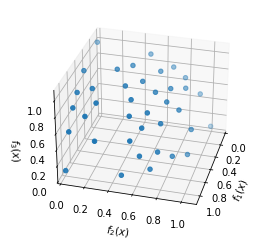

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter([s.objectives[0] for s in algorithm.result],
           [s.objectives[1] for s in algorithm.result],
           [s.objectives[2] for s in algorithm.result])
ax.set_xlabel("$f_1(x)$")
ax.set_ylabel("$f_2(x)$")
ax.set_zlabel("$f_3(x)$")
ax.set_xlim([0, 1.1])
ax.set_ylim([0, 1.1])
ax.set_zlim([0, 1.1])
ax.view_init(elev=30.0, azim=15)
plt.show()

Create a random tree and then apply it to RICE

In [1]:
from POT.optimization import PolicyTreeOptimizer
from POT.tree import PTree
import numpy as np

def random_tree(terminal_ratio=0.5,
               max_depth=4,
               discrete_actions=True,
               action_names=['miu_2100', 'miu_2150', 'miu_2200', 'miu_2125', 'sr_02', 'sr_03', 'sr_04', 'sr_05'],
#                action_bounds=[[0,10], [5, 20]],
               num_features=3,
               feature_names=['mat', 'net_output', 'year'],
               feature_bounds=[[780, 1300], [55, 2300], [2005, 2305]],
               discrete_features=None
               ):
    '''

    Parameters
    ----------
    terminal_ration : float, optional

    '''

    depth = np.random.randint(1, max_depth + 1)
    L = []
    S = [0]

    while S:
        current_depth = S.pop()

        # action node
        if current_depth == depth or (current_depth > 0 and \
                                      np.random.rand() < terminal_ratio):
            if discrete_actions:
                L.append([str(np.random.choice(action_names))])
            else:
                L.append([np.random.uniform(*action_bounds)])

        else:
            x = np.random.choice(num_features)
            v = np.random.uniform(*feature_bounds[x])
            L.append([x, v])
            S += [current_depth + 1] * 2

    T = PTree(L, feature_names, discrete_features)
    T.prune()
    return T

T = random_tree()

# from pyborg import BorgMOEA


# if __name__ == "__main__":

#     # define a DTLZ2 problem instance from the Platypus library
#     nobjs = 3
#     problem = Problem(2,2)
#     problem.types[:] = [String(), String()]

#     # define and run the Borg algorithm for 10000 evaluations
#     algorithm = BorgMOEA(problem, epsilons=0.1)
#     algorithm.run(10000)

#     # print the results
#     for solution in algorithm.result:
#         print(solution.objectives)

In [2]:
T

In [6]:
from RICE_model.IAM_RICE import RICE

years_10 = []
for i in range(2005, 2315, 10):
    years_10.append(i)

regions = [
    "US",
    "OECD-Europe",
    "Japan",
    "Russia",
    "Non-Russia Eurasia",
    "China",
    "India",
    "Middle East",
    "Africa",
    "Latin America",
    "OHI",
    "Other non-OECD Asia",
]

In [7]:
RICE(years_10, regions).POT_control(T)

(-42467.03734894892, -5976708.234413775, 3.973075674325643)

Now integrate into 1 function

In [9]:
from POT.optimization import PolicyTreeOptimizer
from POT.tree import PTree
import numpy as np

from RICE_model.IAM_RICE import RICE

years_10 = []
for i in range(2005, 2315, 10):
    years_10.append(i)

regions = [
    "US",
    "OECD-Europe",
    "Japan",
    "Russia",
    "Non-Russia Eurasia",
    "China",
    "India",
    "Middle East",
    "Africa",
    "Latin America",
    "OHI",
    "Other non-OECD Asia",
]

model = RICE(years_10, regions)

def POT_OPT(terminal_ratio=0.5,
               max_depth=4,
               discrete_actions=True,
               action_names=['miu_2100', 'miu_2150', 'miu_2200', 'miu_2125', 'sr_02', 'sr_03', 'sr_04', 'sr_05'],
#                action_bounds=[[0,10], [5, 20]],
               num_features=3,
               feature_names=['mat', 'net_output', 'year'],
               feature_bounds=[[780, 1300], [55, 2300], [2005, 2305]],
               discrete_features=None
               ):
    '''

    Parameters
    ----------
    terminal_ration : float, optional

    '''

    depth = np.random.randint(1, max_depth + 1)
    L = []
    S = [0]

    while S:
        current_depth = S.pop()

        # action node
        if current_depth == depth or (current_depth > 0 and \
                                      np.random.rand() < terminal_ratio):
            if discrete_actions:
                L.append([str(np.random.choice(action_names))])
            else:
                L.append([np.random.uniform(*action_bounds)])

        else:
            x = np.random.choice(num_features)
            v = np.random.uniform(*feature_bounds[x])
            L.append([x, v])
            S += [current_depth + 1] * 2

    T = PTree(L, feature_names, discrete_features)
    T.prune()
    
    m1, m2, m3 = model.POT_control(T)
    return m1, m2, m3

m1, m2, m3 = POT_OPT()

In [12]:
m3

4.141479028627507

Now change function so that it can be taken as input for Borg in the platypus-opt lib

In [21]:
from POT.optimization import PolicyTreeOptimizer
from POT.tree import PTree
import numpy as np

from RICE_model.IAM_RICE import RICE

from platypus import NSGAII, Problem, Real
from pyborg import BorgMOEA

years_10 = []
for i in range(2005, 2315, 10):
    years_10.append(i)

regions = [
    "US",
    "OECD-Europe",
    "Japan",
    "Russia",
    "Non-Russia Eurasia",
    "China",
    "India",
    "Middle East",
    "Africa",
    "Latin America",
    "OHI",
    "Other non-OECD Asia",
]

model = RICE(years_10, regions)
# np.random.seed(10)

action_names=['miu_2100', 'miu_2150', 'miu_2200', 'miu_2125', 'sr_02', 'sr_03', 'sr_04', 'sr_05']
feature_names=['mat', 'net_output', 'year']
feature_bounds=[[780, 1300], [55, 2300], [2005, 2305]]

def random_tree(terminal_ratio=0.5,
               max_depth=4,
               discrete_actions=True,
               action_names=action_names,
#                action_bounds=[[0,10], [5, 20]],
               feature_names=feature_names,
               feature_bounds=feature_bounds,
               discrete_features=None,
               model=model
               ):
    '''

    Parameters
    ----------
    terminal_ration : float, optional

    '''
    
    num_features = len(feature_names)

    depth = np.random.randint(1, max_depth + 1)
    L = []
    S = [0]

    while S:
        current_depth = S.pop()

        # action node
        if current_depth == depth or (current_depth > 0 and \
                                      np.random.rand() < terminal_ratio):
            if discrete_actions:
                L.append([str(np.random.choice(action_names))])
            else:
                L.append([np.random.uniform(*action_bounds)])

        else:
            x = np.random.choice(num_features)
            v = np.random.uniform(*feature_bounds[x])
            L.append([x, v])
            S += [current_depth + 1] * 2

    T = PTree(L, feature_names, discrete_features)
    T.prune()
    
    
    m1, m2, m3 = model.POT_control(T)
    return m1, m2, m3

# m1, m2, m3 = random_tree()
# print(m1, m2, m3)

def borg_problem(x):
    m1, m2, m3 = random_tree()
    return m1, m2, m3

problem = Problem(1, 3)
problem.types[:] = Real(-10, 10)
problem.function = borg_problem

# define and run the Borg algorithm for 10000 evaluations
algorithm = BorgMOEA(problem, epsilons=0.1)
algorithm.run(50000)

# print the results
for solution in algorithm.result:
    print(solution.objectives)


[-42501.01206080477, -143179071051.17148, 4.024753868426908]
[-42457.8877931768, -218017430847.1841, 3.8974160507690834]
[-42499.81004429868, -249992198946.26392, 4.026755508223575]
[-42499.770223981104, -273808337962.01166, 4.026755508223575]
[-42457.55974387654, -276958094776.6829, 3.8974160507690834]
[-42499.26062237246, -279565289376.2022, 4.026755508223575]
[-42496.55043632131, -280400408936.0725, 3.99823258179653]
[-42498.71318228535, -284289939725.8695, 4.026755508223575]
[-42496.83522998518, -293538224583.0767, 4.061411713639997]
[-42491.68108554619, -296986506220.11945, 3.99823258179653]
[-42456.70122118388, -297308981454.69684, 3.8993401985058362]
[-42448.80400244774, -297464102706.2211, 3.895677948479156]
[-42426.49556267954, -297553549294.61285, 3.895677948479156]
[-42490.275448488224, -297631226997.1131, 3.997335285204946]
[-42490.19207724266, -297684949250.1238, 3.997335285204946]
[-42423.76551075439, -297708854480.19666, 3.895677948479156]
[-42484.78976862292, -298102478

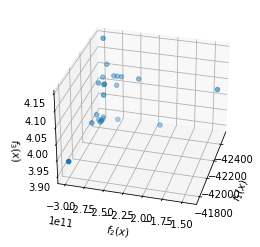

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter([s.objectives[0] for s in algorithm.result],
           [s.objectives[1] for s in algorithm.result],
           [s.objectives[2] for s in algorithm.result])
ax.set_xlabel("$f_1(x)$")
ax.set_ylabel("$f_2(x)$")
ax.set_zlabel("$f_3(x)$")
# ax.set_xlim([-43000, -42000])
# ax.set_ylim([-10000000, -1000000])
# ax.set_zlim([2, 6])
ax.view_init(elev=30.0, azim=15)
plt.show()

In [20]:
# Run with max_nfe = 1000
[-42447.8419702481, -1073811779.4398675, 3.8974160507690834]
[-42499.19591172424, -3192676423.8131924, 4.024753868426908]
[-42446.83412872091, -3747380125.173663, 3.895677948479156]
[-42497.653619469915, -4403650374.082282, 4.024753868426908]
[-42498.22702724898, -5161124665.806349, 4.141483304702572]
[-42433.893083215604, -5357926774.160049, 3.895677948479156]
[-42398.252194404224, -5745857506.41196, 3.895677948479156]
[-42496.66949053721, -5775726904.67714, 4.016728637372896]
[-42496.31235098403, -5847309366.365279, 4.141483304702572]
[-42490.275448488224, -5889055320.556058, 3.997335285204946]
[-42489.361300084296, -5918895496.9880085, 4.141483304702572]
[-42480.35475106758, -5936794308.552284, 3.9500332286052977]
[-42468.67186356269, -5954660611.360741, 3.973075889922211]
[-42354.399468278614, -5966576380.05946, 3.895677948479156]
[-42436.94433779025, -5972555730.670688, 3.9382273979528115]

[-42436.94433779025, -5972555730.670688, 3.9382273979528115]

In [ ]:
# run with 50000 nfe
[-42501.01206080477, -143179071051.17148, 4.024753868426908]
[-42457.8877931768, -218017430847.1841, 3.8974160507690834]
[-42499.81004429868, -249992198946.26392, 4.026755508223575]
[-42499.770223981104, -273808337962.01166, 4.026755508223575]
[-42457.55974387654, -276958094776.6829, 3.8974160507690834]
[-42499.26062237246, -279565289376.2022, 4.026755508223575]
[-42496.55043632131, -280400408936.0725, 3.99823258179653]
[-42498.71318228535, -284289939725.8695, 4.026755508223575]
[-42496.83522998518, -293538224583.0767, 4.061411713639997]
[-42491.68108554619, -296986506220.11945, 3.99823258179653]
[-42456.70122118388, -297308981454.69684, 3.8993401985058362]
[-42448.80400244774, -297464102706.2211, 3.895677948479156]
[-42426.49556267954, -297553549294.61285, 3.895677948479156]
[-42490.275448488224, -297631226997.1131, 3.997335285204946]
[-42490.19207724266, -297684949250.1238, 3.997335285204946]
[-42423.76551075439, -297708854480.19666, 3.895677948479156]
[-42484.78976862292, -298102478730.40686, 3.964194978877905]
[-42412.64423479503, -298180130521.23987, 3.895677948479156]
[-42498.30172665828, -298221856219.5493, 4.141483304702572]
[-42483.965872003166, -298239760022.9669, 3.964194978877905]
[-42400.60856235141, -298245738087.2359, 3.895677948479156]
[-42475.36845685582, -298251718827.7606, 4.024192462855429]
[-42373.40539600082, -298257694739.84485, 3.9109170468903285]
[-42329.81598965562, -298275499888.7347, 3.9382273979528115]
[-42229.06232841884, -298281467531.7926, 3.9373638436905565]
[-41771.39238148815, -298287412043.76434, 3.9360835295177523]
[-42385.00641589413, -298293388398.3856, 4.026755508223575]

In [ ]:
# Nordhaus policy results for reference
-42456.671297561035 -5976340.535159354 3.9574968783133793

Other test with platypus-opt library

For example, optimizing a simple biobjective problem with a single real-valued decision variables is accomplished in Platypus with:

In [5]:
from platypus import NSGAII, Problem, Real

def schaffer(x):
    return [x[0]**2, (x[0]-2)**2]

problem = Problem(1, 2)
problem.types[:] = Real(-10, 10)
problem.function = schaffer

algorithm = NSGAII(problem)
algorithm.run(10000)

# print the results
for solution in algorithm.result:
    print(solution.objectives)

[4.003096973324801, 5.992207870007803e-07]
[2.819606131554613e-08, 4.0006716955103245]
[3.2275238065533043, 0.04139961441378433]
[3.0894511458544827, 0.058717305516639076]
[2.7909520073273346, 0.10849496539752104]
[0.11220331439736629, 2.772332786936649]
[0.08932688761365212, 2.893822725421636]
[0.15991283816002091, 2.5603487067291066]
[3.470238627649451, 0.018808023906890754]
[2.8993014916984077, 0.08836735112895691]
[3.610896016652512, 0.009952899746545311]
[0.4132860517252887, 1.8417929392311838]
[0.27694771100950727, 2.1719148428214314]
[2.684113858451459, 0.1308076901709518]
[1.0983515496419956, 0.9062608070325361]
[0.24491149258254116, 2.2653701615362154]
[0.9957033392356137, 1.0043059112951411]
[1.7225586386423846, 0.47270738186585065]
[0.0246611219815908, 3.3965067208146063]
[1.1550280056659856, 0.8561388362809722]
[0.1336130515502531, 2.6714882877889488]
[1.396948522571064, 0.6692454480181554]
[1.849478461388129, 0.4096571975771512]
[2.0255692790732818, 0.3326694498849525]
[0.